## 1. Module Import

In [22]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

## 2. Data Input

In [23]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 학습셋과 테스트셋 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

## 3. Model Settings

In [65]:
# tanh
print('<<tanh model>>')
model = Sequential()
model.add(Embedding(5000, 100))  # 맨 첫층으로 데이터 전처리 과정을 통해 다음 층이 처리 가능한 형태로 변환.
model.add(Dropout(0.5)) # 과적합을 피하기 위해 랜덤 노드를 꺼줌. 해당 코드는 50%의 노드를 끔.
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4)) # 1차원 컨볼루션층 추가 이후 맥스풀링을 이용해 특징(=최댓값) 출력
model.add(LSTM(55)) # LSTM은 RNN에서 기억값에 대한 가중치를 제어
model.add(Dense(1))
model.add(Activation('sigmoid')) 
model.summary()

# Compile
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

<<tanh model>>
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, None, 100)         500000    
_________________________________________________________________
dropout_23 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 55)                26400     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 56        
_________________________________________________________________
activation_19 (Activation)   (None, 1)

## 4. Running

In [66]:
# 모델 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

Epoch 1/5
250/250 [==============================] - 11s 43ms/step - loss: 0.4452 - accuracy: 0.7741 - val_loss: 0.3545 - val_accuracy: 0.8472
Epoch 2/5
250/250 [==============================] - 10s 41ms/step - loss: 0.2954 - accuracy: 0.8743 - val_loss: 0.3311 - val_accuracy: 0.8560
Epoch 3/5
250/250 [==============================] - 10s 41ms/step - loss: 0.2539 - accuracy: 0.8946 - val_loss: 0.3292 - val_accuracy: 0.8583
Epoch 4/5
250/250 [==============================] - 10s 41ms/step - loss: 0.2163 - accuracy: 0.9151 - val_loss: 0.3305 - val_accuracy: 0.8540
Epoch 5/5
782/782 [==============================] - 3s 3ms/step - loss: 0.3585 - accuracy: 0.8505

 Test Accuracy: 0.8505


## 5. Result

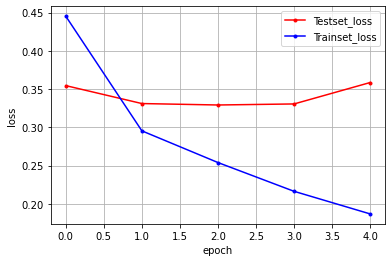

782/782 [==============================] - 3s 3ms/step - loss: 0.3585 - accuracy: 0.8505

 Test Accuracy ===> 85.05%
782/782 [==============================] - 3s 3ms/step - loss: 0.3585 - accuracy: 0.8505

 Test Accuracy ===> 85.05


In [67]:
# tanh
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

print("\n Test Accuracy ===> {}%" .format(round((model.evaluate(x_test, y_test)[1])*100,2)))
print("\n Test Accuracy ===> %.2f" % ((model.evaluate(x_test, y_test)[1])*100))